# Homework Lecture4

Text Classification, Validation and ROC curve.

## Preliminaries

### Imports

In [1]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold

%matplotlib inline

### Random Seed

In [2]:
seed=136
np.random.seed(seed)

### Data Directories

In [3]:
raw_data_dir=r"../../raw/C50/C50train"
test_dir    =r"../../raw/C50/C50test"
data_dir=r"../../data/C50"


## Document Data

### Corpus (List of documents)

In [4]:
documents_filename=data_dir+"/C50_documents.csv"
documents=pd.read_csv(documents_filename,index_col="document_id")
documents.head()

,filename,label
document_id,,
0,../../raw/C50/C50train/RobinSidel/147604newsML...,RobinSidel
1,../../raw/C50/C50train/RobinSidel/196812newsML...,RobinSidel
2,../../raw/C50/C50train/RobinSidel/219316newsML...,RobinSidel
3,../../raw/C50/C50train/RobinSidel/251225newsML...,RobinSidel
4,../../raw/C50/C50train/RobinSidel/177958newsML...,RobinSidel


In [5]:
test_documents_filename=data_dir+"/C50_test_documents.csv"
test_documents=pd.read_csv(test_documents_filename,index_col="document_id")
test_documents.head()

,filename,label
document_id,,
0,../../raw/C50/C50test/RobinSidel/347781newsML.txt,RobinSidel
1,../../raw/C50/C50test/RobinSidel/306379newsML.txt,RobinSidel
2,../../raw/C50/C50test/RobinSidel/324849newsML.txt,RobinSidel
3,../../raw/C50/C50test/RobinSidel/284041newsML.txt,RobinSidel
4,../../raw/C50/C50test/RobinSidel/363477newsML.txt,RobinSidel


### Load Pre-Trained Features

#### Load Features

<div class="alert alert-block alert-info"> Problem 1.0 </div>
Load the diagram features from files `digram_features.p` and digram_test_features.p` from the data directory (you generated this files while running 'TexFeatures' notebook)

In [6]:
digram_features_filename=data_dir+"/"+"digram_features.p"
digram_features=pickle.load(open(digram_features_filename,"rb"))

digram_test_features_filename=data_dir+"/"+"digram_test_features.p"
digram_test_features=pickle.load(open(digram_test_features_filename,"rb"))

<div class="alert alert-block alert-info"> Problem 1.2 </div>
How many documents are collected in `features`?

In [7]:
Y=documents["label"]
Y_test = test_documents["label"]
X=digram_features
X_test=digram_test_features

print(Y.shape[0])

2500


<div class="alert alert-block alert-info"> Problem 1.3 </div>
What is the size of the digram vocabulary?

In [8]:
print(X.shape[1])

388209


<div class="alert alert-block alert-info"> Problem 1.4 </div>
save the features of the  first document into a vector named `v`.
What is its shape?

In [9]:
v = X[0]
v.shape

(1, 388209)

<div class="alert alert-block alert-info"> Problem 1.5 </div>

Do we need to normalize the vector features? how can you tell?

In [10]:
v.dot(v.T)[0,0]

#We need to normalize the vector, because the dot product is not 1.

882

<div class="alert alert-block alert-info"> Problem 1.6 </div>
If necesary: use `sklearn.preprocessing.normalize` to normalize features and test features.

In [11]:
features = normalize(X)
test_features = normalize(X_test)


## K-Neighbors Text Classification

<div class="alert alert-block alert-info"> Problem 2.0 </div>
using `sklearn.model_selection.train_test_split` to separate data into a 90% training set an a 10% validation set

In [12]:
train_val = train_test_split(features, Y, train_size = 0.9, test_size = 0.1)

feature_train = train_val[0]
feature_val = train_val[1]
class_train = train_val[2]
class_val = train_val[3]

<div class="alert alert-block alert-info"> Problem 2.1 </div>
Show the sizes of train and validation sets

In [13]:
print(feature_train.shape)
print(feature_val.shape)


(2250, 388209)
(250, 388209)


<div class="alert alert-block alert-info"> Problem 2.2 </div>
To check that all your inputs are set up correctly use `sklearn.neighbors.KNeighborsClassifier` to fit a nearest neighbor classifier to the training data

In [14]:
sk_model=KNeighborsClassifier(1)
sk_model.fit(feature_train,class_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

<div class="alert alert-block alert-info"> Problem 2.3 </div>
What is the predicted label for the first document on the test set?
Does it agree with the true label for that document?

In [15]:
Y_pred=sk_model.predict(X_test)

print(np.average(Y_pred==Y_test))

print("Predict label for the first document: ",Y_pred[0])
print("Actual label for the first document: ",Y_test[0])

0.5272
Predict label for the first document:  EricAuchard
Actual label for the first document:  RobinSidel


In [16]:
#According to accuracy and predicted label results, it doesn't agree with the true label for that document.

<div class="alert alert-block alert-info"> Problem 2.4 </div>
Use the train/valuation split to select the optimal number of neighbors K in K-neighbors classifier. Use accuracy as 
your selection metric.

In [17]:
# feature_train = train_val[0]
# feature_val = train_val[1]
# class_train = train_val[2]
# class_val = train_val[3]
K = np.arange(1,21)
accuracy = np.zeros(20)

for i in K:
    sk_model=KNeighborsClassifier(i)
    sk_model.fit(feature_train,class_train)
    Y_pred=sk_model.predict(feature_val)
    print(i,"  ",np.average(Y_pred==class_val))
    accuracy[i-1] = np.average(Y_pred==class_val)

opt_index = accuracy.argmax()
print("The optimal numebr of neighbors K is ",K[opt_index])
print("The optimal accuracy is ",accuracy[opt_index])

1    0.756
2    0.692
3    0.656
4    0.64
5    0.608
6    0.6
7    0.588
8    0.592
9    0.576
10    0.584
11    0.58
12    0.588
13    0.6
14    0.596
15    0.572
16    0.576
17    0.556
18    0.556
19    0.564
20    0.564
The optimal numebr of neighbors K is  1
The optimal accuracy is  0.756


<div class="alert alert-block alert-info"> Problem 2.5 </div>
Re-train the best model will all non-test documents and evaluate performance on the test data set.

In [18]:
Y=documents["label"]
Y_test = test_documents["label"]
# X=digram_features
# X_test=digram_test_features
features = normalize(X)
test_features = normalize(X_test)

model=KNeighborsClassifier(opt_index+1)
model.fit(features,Y)
Y_pred = model.predict(test_features)

print("The optimal numebr of neighbors K is ",K[opt_index])
print("The optimal accuracy is ",np.average(Y_pred==Y_test))



The optimal numebr of neighbors K is  1
The optimal accuracy is  0.5348


<div class="alert alert-block alert-info"> Problem 2.6 </div>
Is there a significant difference between the performance in the training and test set? can you speculate on why?

In [19]:
#There is a significant lower performance in the test set. 
#I think test set probably is from different distribution, compared to the train data distribution.


### Naive Bayes Classifier Amazon Reviews

In [20]:
data_dir=r"../../raw/amazon-reviews"

In [21]:
reviews_filename=data_dir+"/reviews.csv"    

<div class="alert alert-block alert-info"> Problem 3.0 </div>
Save file `reviews.csv` posted in canvas into the `data_dir` above

<div class="alert alert-block alert-info"> Problem 3.1 </div>
Read the reviews file into a data frame

In [22]:
reviews = pd.read_csv(reviews_filename)

<div class="alert alert-block alert-info"> Problem 3.2 </div>
Use panda's function isna() to count how many rows have a missing "Summary" column

In [23]:
sum(reviews['Summary'].isna() == True)

27

<div class="alert alert-block alert-info"> Problem 3.3 </div>
Use panda's function fillna() to turn missing summaries into empty ("") summaries

In [24]:
reviews['Summary'].fillna('',inplace = True)
reviews['Summary'].isna().sum()

0

<div class="alert alert-block alert-info"> Problem 3.4 </div>
Create two numpy arrays:
1. `documents_all` containing the contents of the "Summary" column, after replacing `nan`s by empty strings.
2. `labels_all` containing the "Score" column


In [49]:
document_all = reviews['Summary'].values
labels_all = reviews['Score'].values
print(document_all.shape,labels_all.shape)

(568454,) (568454,)


<div class="alert alert-block alert-info"> Problem 3.5 </div>
Split `all_documents` and `labels_all` into a training  and test document set using a 10% test split

In [51]:
train_test = train_test_split(document_all, labels_all, train_size = 0.9, test_size = 0.1)

document_train = train_test[0]
document_test = train_test[1]
labels_train = train_test[2]
labels_test = train_test[3]
print(document_train.shape,document_test.shape,labels_train.shape,labels_test.shape)

(511608,) (56846,) (511608,) (56846,)


<div class="alert alert-block alert-info"> Problem 3.6 </div>
Create `count`, `set` and `Tfidf` features both for your training and test sets using `CountVectorizer` and `TfidfVectorizer`.
1. Set the `input` variable to "content", as the document array contains the text of the documents not  their filenames as in the `C50` example.
2. ** Do not ** set the `tokenizer` and `stopword` variables, they slow down the processing significantly, and, for this example do not really improve performance.

In [52]:
countVectorizer=CountVectorizer(input="content")

In [53]:
setVectorizer=CountVectorizer(input="content",binary=True)

In [54]:
tfidfVectorizer=TfidfVectorizer(input="content")

In [55]:
count_feature = countVectorizer.fit_transform(document_train)
set_feature = setVectorizer.fit_transform(document_train)
tfidf_feature = tfidfVectorizer.fit_transform(document_train)

In [56]:
count_test_feature = countVectorizer.transform(document_test)
set_test_feature = setVectorizer.transform(document_test)
tfidf_test_feature = tfidfVectorizer.transform(document_test)

<div class="alert alert-block alert-info"> Problem 3.7 </div>
Show the number of documents in the training set, and the size of the vocabulary.

In [57]:
print("The number of document in the training set is ",count_feature.shape[0])
print("The size of the vocabulary is ",count_feature.shape[1])      

The number of document in the training set is  511608
The size of the vocabulary is  32052


<div class="alert alert-block alert-info"> Problem 3.8 </div>
We will perform binary classification: create `Y` and `Y_test` variables that are true if the review score is larger than 3
(positive review) and false otherwise (negative review)

In [58]:
Y = (labels_train > 3)
Y_test = (labels_test > 3)

<div class="alert alert-block alert-info"> Problem 3.9 </div>
What proportion of reviews are positive on the training set?

In [73]:
np.sum(Y)/len(Y)


0.7806152366655721

<div class="alert alert-block alert-info"> Problem 3.10 </div>
To check that you have all your inputs set up correctly check that you
can fit a `MultinomialNB` with smoothing $\alpha=1$ to the count features.
What prediction accuracy do you obtain *in sample* in the training set?

In [84]:
print(Y.shape)

print(count_feature.shape)
sk_model=MultinomialNB(alpha=1)  
# For example, it models the probability of counts for rolling a k-sided die n times.
# For n independent trials each of which leads to a success for exactly one of k categories,
# with each category having a given fixed success probability, the multinomial distribution 
# gives the probability of any particular combination of numbers of successes for the various categories.
sk_model.fit(count_feature,Y)

Y_pred = sk_model.predict(count_feature)
np.average(Y_pred == Y)


(511608,)
(511608, 32052)


0.885633140998577

<div class="alert alert-block alert-info"> Problem 3.11 </div>
Use K-Fold validation with K=10 to select between multinomial Naive Bayes classifiers trained to either `set`, `count` and `tfidf` featues. Find the features that have the best accuracy. 


State clearly what model you selected.

[HINT] 
1. Look and how this is done on the `Validate_Text` notebook.
2. You can reuse any code you find useful on the `Validate_Text` notebook.

In [90]:
def model_cross_validation(model,X,y,folds):
    kfolds=len(folds)
    train_performance=np.empty(kfolds)
    validation_performance=np.empty(kfolds)
    for idx in range(kfolds):
        train,validation=folds[idx] 
       
        X_train=X[train] 
        y_train=y[train]
        
        model.fit(X_train,y_train)
        train_accuracy=np.average(model.predict(X_train)==y_train)
        X_validation=X[validation]
        y_validation=y[validation]
        validation_accuracy=np.average(model.predict(X_validation)==y_validation)
        train_performance[idx]=train_accuracy
        validation_performance[idx]=validation_accuracy
    return np.array(train_performance),np.array(validation_performance)

In [98]:
k = 10
kf=KFold(10,shuffle=True)
folds=list(kf.split(set_feature))

In [99]:
model=MultinomialNB(alpha = 1)
t,v_set = model_cross_validation(model,set_feature,np.array(Y),folds)
print(t.mean(),v_set.mean())

0.8859484865231488 0.8771930765666571


In [100]:

t,v_count=model_cross_validation(model,count_feature,np.array(Y),folds)
print(t.mean(),v_count.mean())

0.8858674783708741 0.8771246657690522


In [101]:
t,v_tfidf = model_cross_validation(model,tfidf_feature,np.array(Y),folds)
print(t.mean(),v_tfidf.mean())

0.8776307033361173 0.8696638765992818


<div class="alert alert-block alert-info"> Problem 3.12 </div>
Fit the best model to all the training data and compute its accuray on the test set

In [102]:
model.fit(set_feature,np.array(Y))
Y_pred = model.predict(set_test_feature)
accuracy_set = np.average(Y_pred== Y_test)
accuracy_set

0.8809063082714703

<div class="alert alert-block alert-info"> Problem 3.13</div>
Make a box plot showing the distribution of `set`, `count` and `tfidf` accuracies on the K fold cross-validations.

Display clearly in the graph the performance of the best model trained on all the data on the test set.


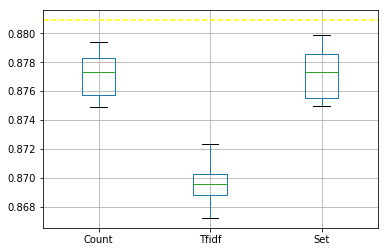

In [103]:
accuracy = np.average(Y_pred== Y_test)
datav = np.vstack((v_count,v_tfidf,v_set)).T
data = pd.DataFrame(datav, columns=["Count","Tfidf","Set"])
ax=data.boxplot()
ax.axhline(y=accuracy,linestyle="dashed",color="Yellow") #Add a horizontal line across the axis.

<div class="alert alert-block alert-info"> Problem 3.14</div>
1. Why do the `test` and `count` results look so similar in this case?
2. Comment on the difference between cross-validation average performace and test performance

In [67]:
#1 #I think the reason why 'test' and 'count' results look so similar is that 
   #  the 'test' result depends on the set features. 
   #Meanwhile, the training model is based on some short sentences and the probabilty 
   #  that a kind of word appear above one time is very low.
   #So, the 'test' result based on set features is almost equal to 'count' result with count features.
#2 #Due to training model depending on short sentences and lower appearance frequency to each word, 
   #test performance with all data will be better than each cross-validation performace with only 10% of total data,
   #Further, the model of test performance will have more parameters to make better prediction.

<div class="alert alert-block alert-info"> Problem 4.0 </div>
With the best features  features fitted to the full training set:
use `sklearn` `model.predict_prob` function to compute the probabilities of the positive class.

[HINT] `model.predict_prob` returns probabilities for both the negative and positive class, we only need the positive class

In [68]:
model.fit(set_feature,Y)
p = model.predict_proba(set_test_feature)
Prob_positive = p[:,1]

<div class="alert alert-block alert-info"> Problem 4.1 </div>
use `sklearn` `metrics.roc_curve` to create a roc_curve for the best features classifier

Plot the ROC curve.

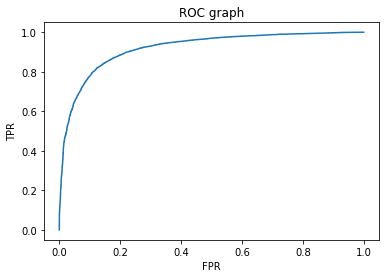

In [69]:
#Compute Receiver operating characteristic (ROC)
#Note: this implementation is restricted to the binary classification task.

fpr, tpr, thresholds = metrics.roc_curve(Y_test, Prob_positive)
plt.plot(fpr,tpr,label = 'ROC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC graph")
plt.show()

<div class="alert alert-block alert-info"> Problem 4.2 </div>
1. Find the point on the ROC curve with a threshold probability closest to 0.5.
2. Show its rate of false positives and of false negatives.
3. Show its accuracy and compare it to the best classifier accuracy that you computed before

In [70]:
#1
#2
goal_index = np.argmin(np.abs(thresholds-0.5))
goal_value = thresholds[goal_index]
print("The goal point and value is ", goal_index, "and ", goal_value)
print("Rate of False Positive and of False Negative: ",fpr[goal_index],"and ",tpr[goal_index])
#3
accuracy = (1 - fpr[goal_index])*np.mean((Y_test == False)) + tpr[goal_index]*np.mean((Y_test == True))
print("Accurancy from ROC is ", accuracy)

print("Accurancy from best classfier is ",accuracy_set)

The goal point and value is  11009 and  0.5000674037056736
Rate of False Positive and of False Negative:  0.31797716674706544 and  0.9365654836966313
Accurancy from ROC is  0.8808711254969568
Accurancy from best classfier is  0.8809063082714703


<div class="alert alert-block alert-info"> Problem 4.3 </div>
Redraw the ROC curve, highlighting the point of the curve that correspont to optimal accuracy.

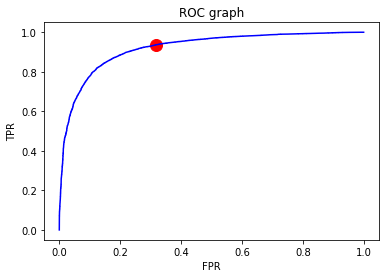

In [71]:
plt.plot(fpr[goal_index],tpr[goal_index],label = "point to optimal accurancy", color = "Red",marker='o',markersize =12)
plt.plot(fpr,tpr,label = 'ROC',color = 'blue')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC graph")
plt.show()